# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset:

Import the necessary libraries and create your dataframe(s).

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from pyzipcode import ZipCodeDatabase #I looked for libraries that work well with ZIP codes and found this. There is some documentation and examples at https://pypi.org/project/pyzipcode/
# zcdb = ZipCodeDatabase() #Ended up not needing this, but might use this when analyzing the data.

prcl = pd.read_csv("Prcl_7th_Ward.csv") #Note I pre-filtered the original database (in Access) to only be properties in the 7th Ward, since the file was too large with all the wards.
forestry = pd.read_csv("forestry-maintenance-properties.csv") #This dataframe has information on the properties that the city considers vacant and mows their lawns, I can connect it with the previous dataframe on PARCELID

#Note I'm going to merge my to data sets into one for the rest of these exercises:

print(prcl.shape)
df = prcl.merge(forestry, how="left", left_on='AsrParcelId', right_on='PARCELID') #I'm using a Left Merge, because I only want the data for the properties that are in the Parcel DF and the rest is not needed.
print(df.shape)
#It added 4 columns and no rows, so it looks like it did it right!)
print(df.columns.to_list())
#I will drop many of my columns in a future step (below)
# df.to_csv('combined_df.csv', index=False)

(8526, 187)
(8526, 191)
['CityBlock', 'Parcel', 'OwnerCode', 'AsrParcelId', 'ColParcelId', 'ColCityBlock', 'ColParcel', 'ParcelId', 'PrimAddrRecNum', 'AddrType', 'LowAddrNum', 'LowAddrSuf', 'HighAddrNum', 'HighAddrSuf', 'NLC', 'Parity', 'StPreDir', 'StName', 'StType', 'StSufDir', 'StdUnitNum', 'OwnerName', 'OwnerName2', 'OwnerAddr', 'OwnerCity', 'OwnerState', 'OwnerCountry', 'OwnerZIP', 'OwnerRank', 'LegalDesc1', 'LegalDesc2', 'LegalDesc3', 'LegalDesc4', 'LegalDesc5', 'AsrClassCode', 'PropertyClassCode', 'AsrLandUse1', 'AsrLanduse2', 'IsAbatedProperty', 'AbatementType', 'AbatementStartYear', 'AbatementEndYear', 'RedevPhase', 'RedevYearEnd', 'RedevPhase2', 'RedevYearEnd2', 'VacantLot', 'SpecBusDist', 'SpecBusDist2', 'SpecBusDist3', 'TIFDist', 'LendingAgcy', 'Condominium', 'NbrOfUnitsSource', 'NbrOfUnits', 'NbrOfApts', 'Frontage', 'LandArea', 'RecDailyDate', 'RecDailyNum', 'RecBookNum', 'RecPageNum', 'AsdLand', 'AsdImprove', 'AsdTotal', 'AsdResLand', 'AsdResImprove', 'AsdComLand', 'AsdCo

C:\Users\LC Harrison Sand\AppData\Local\Temp\ipykernel_22804\2524935475.py:7: DtypeWarning: Columns (9,27,97,107,171) have mixed types. Specify dtype option on import or set low_memory=False.
  prcl = pd.read_csv("Prcl_7th_Ward.csv") #Note I pre-filtered the original database (in Access) to only be properties in the 7th Ward, since the file was too large with all the wards.


## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [105]:
cat_count= df['CATEGORY'].count() #Tells me how many locations are on the mowing list in the new data set.
vac_count = df.loc[df['VacantLot'] == True]['VacantLot'].count() #Tells me how many locations are listed as VacantLot == True, originally from PRCL Data.
vac_cat_count = df.loc[(df['VacantLot'] == True) & (df['CATEGORY'].notnull())]['VacantLot'].count() # Tells me how many locations have both True value for VacantLot and have data in CATEGORY
vac_nocat_count = df.loc[(df['VacantLot'] == True) & (df['CATEGORY'].isnull())]['VacantLot'].count() #Vacant Lot, but not mowing schedule
novac_cat_count = df.loc[(df['VacantLot'] == False) & (df['CATEGORY'].notnull())]['VacantLot'].count() #Not Vacant Lot, but on the Mowing Schedule
type_cat_novl = df.loc[(df['VacantLot'] == False) & (df['CATEGORY'].notnull())]['CATEGORY'].unique() #What categories are the FALSE vacant lot's in the mowing schedule
type_cat_truevl = df.loc[(df['VacantLot'] == True) & (df['CATEGORY'].notnull())]['CATEGORY'].unique() #What categories are True vacantlot in the mowing schedule

mow_ownerzips_count = len(df.loc[(df['CATEGORY'].notnull()) & (df['OwnerZIP'].notnull())])
mow_owners_without_zips = df.loc[df['CATEGORY'].notnull() & df['OwnerZIP'].isnull()]['OwnerName'].unique() #I'm looking for who own's the properties that do not have ZIP Codes associated with them.
mow_owners_zip_nan = df.loc[df['CATEGORY'].notnull() & df['OwnerZIP'] == 'nan']['OwnerName'].unique()


df['TaxBalDue'] = df['TaxBalDue'].replace(',','', regex=True) #Gets rid of commas to allow me to change it to a float - found here: https://saturncloud.io/blog/how-to-handle-the-pandas-valueerror-could-not-convert-string-to-float/
df['TaxBalDue'] = df['TaxBalDue'].astype('float') #Had to convert this to numbers, since it was not typed as a numeric values
mow_tax_due_count = df.loc[(df['CATEGORY'].notnull()) & df['TaxBalDue'] > 0]['TaxBalDue'].count()
mow_tax_due_sum = df.loc[(df['CATEGORY'].notnull()) & df['TaxBalDue'] > 0]['TaxBalDue'].sum()

#Based on the above I am not going to use the category of Vacantlot's since I am not sure what it is measuring, but I understand what the Mowing Schedule is.

#Printed everything to make it easier to read and understant.
print("Vacant Lots v. Mowing Categories")
print(f"Mowing schedule -{cat_count}")
print(f"Vacant Lots- {vac_count}") #Looking to see if 'VacantLot' is equivalent to 'CATEGORY'
print(f"Vacantlots and on mowing schedule - {vac_cat_count}")
print(f"Vacantlots, but not on Mowing Schedule - {vac_nocat_count}")
print(f"Not vacantlot, but on mowing - {novac_cat_count}")
print("\n")
print(f"Categories on Mowing Schedule that are listed as Vacant Lots: \n {type_cat_truevl}")
print(f"\n Categories on Mowing Schedule that are not listed as Vacant Lots: \n {type_cat_novl}")
print("\n \n")
print("Mowing Data:")
print(f"Number of properties that are on mowing schedule that have Owner ZIP listed - {mow_ownerzips_count}")
print(f"Names of Owner's of properties with no ZIP listed - {mow_owners_without_zips}")
print(f"Names of Owner's of properties with string nan ZIP listed - {mow_owners_zip_nan}")

"""Based on above the properties without ZIPCodes are owned by "'STATE OF MISSOURI' 'STATE OF MO' 'CITY OF ST LOUIS'
'HOLY CROSS EVANGELICAL LUTHERAN' 'ST LOUIS UNIVERSTIY HOSP'" - For the state and city properties I will exclude and drop them, I will find ZIP Codes for the other ones.

I will give the following values for ZIPS:
STATE OF MISSOURI - Drop Rows
STATE OF MO -  Drop Rows
CITY OF ST LOUIS - Drop Rows
I decided to drop the above, since they are in a different category of property than my business question is looking for.

HOLY CROSS EVANGELICAL LUTHERAN - 63118 from https://www.holycrossstl.org/
ST LOUIS UNIVERSTIY HOSP -  63117 from Google Search of SSM Administrative Offices
"""

print(f"Amount of locations on Mowing Schedule that owe property taxes - {mow_tax_due_count}")
print(f"Amount these property taxes due- {mow_tax_due_sum}")

#Below fixes this missing data:

#Dropping Rows
to_drop_locs = ['STATE OF MISSOURI', 'STATE OF MO', 'CITY OF ST LOUIS']

for loc in to_drop_locs:
    df = df.loc[df['OwnerName'] != loc]

df.loc[df["OwnerName"] == 'HOLY CROSS EVANGELICAL LUTHERAN', 'OwnerZIP'] = 63118
df.loc[df["OwnerName"] == 'ST LOUIS UNIVERSTIY HOSP', 'OwnerZIP'] = 63116

Vacant Lots v. Mowing Categories
Mowing schedule -1050
Vacant Lots- 974
Vacantlots and on mowing schedule - 622
Vacantlots, but not on Mowing Schedule - 352
Not vacantlot, but on mowing - 428


Categories on Mowing Schedule that are listed as Vacant Lots: 
 ['Vacant Lot' 'Fenced & Locked or Paved Lot' 'Primary Highway Easement'
 'Vacant Building' 'Mow to Own' 'Garden Lot' 'Demolition' 'Garden Lot '
 'Playground']

 Categories on Mowing Schedule that are not listed as Vacant Lots: 
 ['Fenced & Locked or Paved Lot' 'Vacant Building' 'Vacant Lot'
 'Mow to Own' 'Commercial' 'Primary Highway Easement' 'Rehab' 'Demolition'
 'Garden Lot']

 

Mowing Data:
Number of properties that are on mowing schedule that have Owner ZIP listed - 1014
Names of Owner's of properties with no ZIP listed - ['STATE OF MISSOURI' 'STATE OF MO' 'CITY OF ST LOUIS'
 'HOLY CROSS EVANGELICAL LUTHERAN' 'ST LOUIS UNIVERSTIY HOSP']
Names of Owner's of properties with string nan ZIP listed - []
Amount of locations on Mowin

## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

In [106]:
'''
From EDA steps, It looks like non-vacant building have been listed with a 0 in VacBldgYear, I will need to set these as nulls. I also need to look to make sure Zip Codes are appropriate too.
'''
print(df.loc[df["VacBldgYear"]== 0]["VacBldgYear"].count())
df.loc[df["VacBldgYear"] == 0, 'VacBldgYear'] = np.nan
print(df.loc[df["VacBldgYear"]== 0]["VacBldgYear"].count())


6291
0


## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [107]:
'''
My df data has many columns that I will not use, it is easier to make a new DataFrame with the columns I want rather than drop the columns I don't want.
I did this in the previous EDA step, but will do it again with less columns.
'''
df = df.loc[:, ['CATEGORY', 'StPreDir', 'StName', 'StType', 'StSufDir', 'StdUnitNum', 'OwnerName', 'OwnerName2', 'OwnerAddr', 'OwnerCity', 'OwnerState', 'OwnerCountry', 'OwnerZIP', 'LandArea', 'VacBldgYear', 'TaxBalDue']]
#I probably kept more than I need, but I might want to see some of this data at the end.



## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [108]:
'''Zip Codes have inconsistent data - some are 5 digits and some are 5+4. I will delete the +4 from any rows that have them.'''
# print(df['OwnerZIP'].unique())

print(df['OwnerZIP'].dtypes) #Checking what type 'OwnerZip' is (It was Object)
df['OwnerZIP'] = df['OwnerZIP'].astype(str) #I'm making them strings, since you normally do not do numeric operations with ZIP codes (and my research suggested this!)
df['OwnerZIP'] = df['OwnerZIP'].str.strip() #Strip any mistaken spaces at beginning or end

#The below: If the ZIP is 4 long it adds a leading 0, since leading 0s look to have been removed at some point and some ZIPs start with 0, 
# if it is longer than 5, it has the 5+4 of ZIPs and I only want the 5, so this truncates it.
# if it is not numeric it will make it null


for i in df.index:
    if len(df.loc[i, 'OwnerZIP']) == 4:
        zip_adder = "0" + df.loc[i,'OwnerZIP'] #ADds leading Zeros to 4 digit zips that start with a 0
        df.loc[i, 'OwnerZIP'] = zip_adder
    elif len(df.loc[i, 'OwnerZIP']) > 5:
        zip_adder = df.loc[i,'OwnerZIP'][0:5] #truncates Zips and cuts off +4
        df.loc[i, 'OwnerZIP'] = zip_adder
    elif df.loc[i, 'OwnerZIP'].isdigit() == False: #Looks for strings that are not numeric and makes null. Leared this from: https://www.geeksforgeeks.org/python-check-whether-string-contains-only-numbers-or-not/
        df.loc[i, 'OwnerZIP'] = np.nan

# Doing the below to check to see if I accidentally made any nulls.
mow_ownerzips_count = len(df.loc[(df['CATEGORY'].notnull()) & (df['OwnerZIP'].notnull())])
mow_owners_without_zips = df.loc[df['CATEGORY'].notnull() & df['OwnerZIP'].isnull()]['OwnerName'].unique() #I'm looking for who own's the properties that do not have ZIP Codes associated with them.
mow_owners_zip_nan = df.loc[df['CATEGORY'].notnull() & df['OwnerZIP'] == 'nan']['OwnerName'].unique() #Just incase it is in string nan.

print(f"Number of properties that are on mowing schedule that have Owner ZIP listed - {mow_ownerzips_count}")
print(f"Names of Owner's of properties with no ZIP listed - {mow_owners_without_zips}")
print(f"Names of Owner's of properties with string nan ZIP listed - {mow_owners_zip_nan}")

object
Number of properties that are on mowing schedule that have Owner ZIP listed - 1012
Names of Owner's of properties with no ZIP listed - []
Names of Owner's of properties with string nan ZIP listed - []


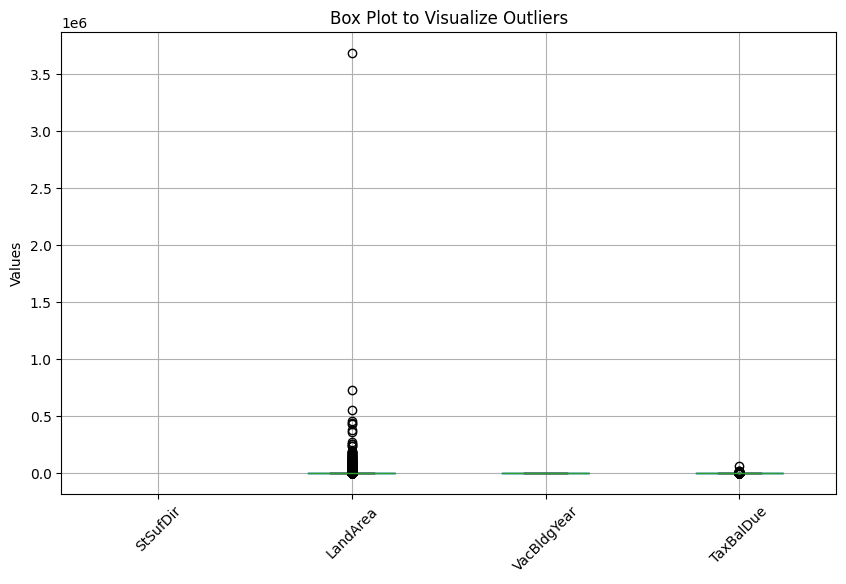

,CATEGORY,StPreDir,StName,StType,StSufDir,StdUnitNum,OwnerName,OwnerName2,OwnerAddr,OwnerCity,OwnerState,OwnerCountry,OwnerZIP,LandArea,VacBldgYear,TaxBalDue
7725,NaN,NaN,RUTGER,ST,NaN,NaN,ST LOUIS UNIVERSITY,C/O TREASURER'S OFFICE,3500 LINDELL BLVD,ST LOUIS,MO,USA,63103,3685200,NaN,0.0
7754,Fenced & Locked or Paved Lot,S,GRAND,BLVD,NaN,NaN,SSM SLUH INC,NaN,10101 WOODFIELD LA,ST LOUIS,MO,USA,63132,725274,2011.0,0.0
439,NaN,NaN,LAFAYETTE,AV,NaN,NaN,ST LOUIS UNIVERSITY,NaN,221 N GRAND BLVD,ST LOUIS,MO,NaN,63103,553212,NaN,0.0
7742,NaN,S,GRAND,BLVD,NaN,NaN,ST LOUIS UNIVERSITY,NaN,221 N GRAND BLVD,ST LOUIS,MO,NaN,63107,460211,NaN,0.0
7591,NaN,NaN,RANKEN,AV,NaN,NaN,ST LOUIS UNIVERSITY,PROPERTY MANAGER,221 N GRAND BLVD DUBOURG HALL RM 210,ST LOUIS,MO,USA,63103,435600,2006.0,0.0
7893,NaN,NaN,PARK,AV,NaN,NaN,SSM CARDINAL GLENNON CHILDRENS HOSP,NaN,1465 S GRAND AV,ST LOUIS,MO,NaN,63104,430730,1999.0,0.0
8520,NaN,NaN,CENTRAL INDUSTRIAL,DR,NaN,NaN,BURLINGTON NORTHERN RAILROAD CO,PROPERTY TAX DEPT,1700 E GOLF ROAD,SCHAUMBURG,IL,USA,60173,377665,NaN,0.0
441,NaN,S,GRAND,BLVD,NaN,NaN,BOARD OF EDUCATION CITY OF ST LOUIS,NaN,801 N 11TH ST,ST LOUIS,MO,NaN,63101,359022,NaN,0.0
7755,NaN,NaN,MOTARD,AV,NaN,NaN,SSM SLUH INC,NaN,10101 WOODFIELD LA,ST LOUIS,MO,NaN,63132,271999,2015.0,0.0
7215,NaN,S,JEFFERSON,AV,NaN,NaN,GREEN STREET JEFFERSON INVESTORS LLC,NaN,8451 MARYLAND AVE STE 200,ST LOUIS,MO,USA,63105,256033,NaN,0.0


,CATEGORY,StPreDir,StName,StType,StSufDir,StdUnitNum,OwnerName,OwnerName2,OwnerAddr,OwnerCity,OwnerState,OwnerCountry,OwnerZIP,LandArea,VacBldgYear,TaxBalDue
2679,NaN,S,GRAND,BLVD,NaN,NaN,SECOND STREET SANDWICHES INC,NaN,920 OLIVE ST,ST LOUIS,MO,NaN,63101,24394,NaN,62469.76
7903,NaN,NaN,PARK,AV,NaN,NaN,WILLERT HOME PRODUCTS INC,NaN,4044 PARK AV,ST LOUIS,MO,NaN,63110,67114,NaN,18939.40
344,NaN,S,THERESA,AV,NaN,NaN,LC2022 LLC,NaN,4240 MANCHESTER AV,ST LOUIS,MO,USA,63110,42074,NaN,17807.32
4377,NaN,NaN,OHIO,AV,NaN,NaN,NATIONAL GRAPHICS,NaN,2711 MIAMI,ST LOUIS MO,NaN,NaN,63118,70200,NaN,17105.98
720,NaN,NaN,OHIO,AV,NaN,NaN,LABAFANA LLC,ATTN KURT RUSSO,1173 EURKEA RD,EUREKA,MO,USA,63025,7985,NaN,13208.61
4291,NaN,NaN,TEXAS,AV,NaN,NaN,SA HOSPITAL REAL ESTATE HOLDINGS - JEFFE,LLC,269 W BONITA AV,CLAREMONT,CA,USA,91711,100630,NaN,12978.25
3249,NaN,S,GRAND,BLVD,NaN,NaN,3200 SOUTH GRAND LLC,NaN,3453 HAWTHORNE BLVD,ST LOUIS,MO,USA,63104,9208,NaN,12287.74
2271,NaN,NaN,PESTALOZZI,ST,NaN,NaN,"LIBBRA, JOSEPH & KELLY",NaN,148 BELLE MAISON LN,ST LOUIS,MO,USA,63141,0,NaN,12151.93
4356,NaN,NaN,TEXAS,AV,NaN,NaN,SA HOSPITAL REAL ESTATE HOLDINGS - JEFFE,LLC,269 W BONITA AV,CLAREMONT,CA,USA,91711,168842,NaN,11463.20
1790,NaN,NaN,SHENANDOAH,AV,NaN,NaN,3200 SHENANDOAH LLC,NaN,P O BOX 16192,ST LOUIS,MO,USA,63105,1476,NaN,10118.48


In [109]:
#Looking for outliers

plt.figure(figsize=(10, 6))
df.boxplot()
# or for a specific column
# df[['LandArea']].boxplot()
plt.title('Box Plot to Visualize Outliers')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

#Looks like land area has an outlier. Let's try to figure out what is going on:

top_10_land = df.sort_values(by='LandArea', ascending=False).head(10)
display(top_10_land)
#It looks like it is St. Louis University, which makes sense since St. Louis University's South Campus is located in this ward.

#TaxesDue might also have some outliers
#This will show the top 10 rows with the largest TaxBalDue
top_10_taxes = df.sort_values(by='TaxBalDue', ascending=False).head(10)
display(top_10_taxes)

#Second Street Sandwiches Inc. is an outlier with almost 62469.76 in taxes due and 5x higher than the next highest number.

#While I do not necessarily need to remove the above outliers, I have made the decision to remove the tax outlier, since this might distort the analysis
#and is only representative of one small business.
#I am keeping the SLU property because they own other property also listed in this database and while an outlier they form a large part of the ward.

df = df.loc[df['TaxBalDue'] != 62469.76]





In [112]:
#Some Descriptive Statistics of the final DataFrame

display(df.info)
display(df.shape)
display(df.columns)
display(df.describe)
display(df.isnull().sum())
display(df.isnull().sum().sum())

<bound method DataFrame.info of                           CATEGORY StPreDir              StName StType  \
0     Fenced & Locked or Paved Lot      NaN            CAROLINE     ST   
1                              NaN      NaN                PARK     AV   
2                              NaN      NaN                PARK     AV   
3                              NaN      NaN                PARK     AV   
4                              NaN      NaN                PARK     AV   
...                            ...      ...                 ...    ...   
8519                           NaN      NaN  CENTRAL INDUSTRIAL     DR   
8520                           NaN      NaN  CENTRAL INDUSTRIAL     DR   
8521                           NaN        S                39TH     ST   
8522                           NaN      NaN                PARK     AV   
8523                           NaN      NaN                PARK     AV   

      StSufDir StdUnitNum                         OwnerName  \
0          NaN  

(8413, 16)

Index(['CATEGORY', 'StPreDir', 'StName', 'StType', 'StSufDir', 'StdUnitNum',
       'OwnerName', 'OwnerName2', 'OwnerAddr', 'OwnerCity', 'OwnerState',
       'OwnerCountry', 'OwnerZIP', 'LandArea', 'VacBldgYear', 'TaxBalDue'],
      dtype='object')

<bound method NDFrame.describe of                           CATEGORY StPreDir              StName StType  \
0     Fenced & Locked or Paved Lot      NaN            CAROLINE     ST   
1                              NaN      NaN                PARK     AV   
2                              NaN      NaN                PARK     AV   
3                              NaN      NaN                PARK     AV   
4                              NaN      NaN                PARK     AV   
...                            ...      ...                 ...    ...   
8519                           NaN      NaN  CENTRAL INDUSTRIAL     DR   
8520                           NaN      NaN  CENTRAL INDUSTRIAL     DR   
8521                           NaN        S                39TH     ST   
8522                           NaN      NaN                PARK     AV   
8523                           NaN      NaN                PARK     AV   

      StSufDir StdUnitNum                         OwnerName  \
0          NaN

CATEGORY        7401
StPreDir        7861
StName             0
StType             0
StSufDir        8413
StdUnitNum      8276
OwnerName          0
OwnerName2      7323
OwnerAddr         41
OwnerCity         42
OwnerState       144
OwnerCountry    3536
OwnerZIP          41
LandArea           0
VacBldgYear     6290
TaxBalDue          0
dtype: int64

np.int64(49368)

In [ ]:
df.to_csv("CP3_End_Data.csv")

## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset?

Yes, I did. I had some missing ZIP codes, I had an irregular amount of 0s for 'VacBldgYear', which I believe just represented null data. I had lots of unecessary columns and I had ZIP codes that were either 5+4 or missing leading zeroes. 

2. Did the process of cleaning your data give you new insights into your dataset?

Yes, it helped me to decide that 'VacantLot' was not helpful for me and to instead use 'CATEGORY'. I'm still not sure what 'VacantLot' represents, but it does not help me with my issue. Cleaning the data allowed me to see this. I went back and changed checkpoint-two because of this.

3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?

The only thing to note is that I kept more columns than I need, but did not as thoroughly clean those columns. If needed I will have to go back and clean those columns.